In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical#one-hot encode target column




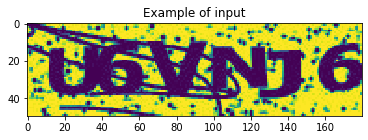

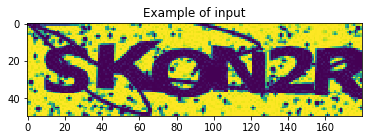

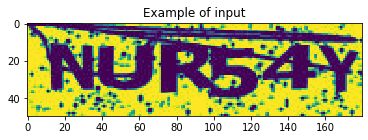

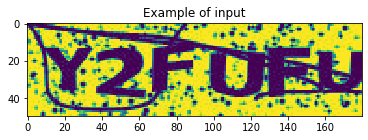

In [3]:
examples = ['000100','000101','000102','000103'];
def show_examples(examples):
    for i in examples:
        img = cv2.imread('dados/treinamento/{}.jpg'.format(i),cv2.IMREAD_GRAYSCALE)
        plt.figure()
        plt.imshow(img.astype(float))
        plt.title('Example of input')

show_examples(examples)

In [4]:
def remove_noise(img):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
    _, img_bin = cv2.threshold(img, 80, 255, cv2.THRESH_BINARY)
    closing=cv2.morphologyEx(img_bin, cv2.MORPH_CLOSE, kernel)
    return cv2.dilate(closing, np.ones((3,3)))

def separate_characters(img):
    X_temp = []
    X_temp.append(img[10:46, 7:39])
    X_temp.append(img[10:46, 37:69])
    X_temp.append(img[10:46, 67:99])
    X_temp.append(img[10:46, 97:129])
    X_temp.append(img[10:46, 127:159])
    X_temp.append(cv2.copyMakeBorder(img[10:46, 158:], 0, 0, 5, 5, cv2.BORDER_CONSTANT, value=256))
    return X_temp

In [5]:
X = {'treinamento':[], 'validacao':[], 'teste':[]}
Y = {'treinamento':[], 'validacao':[], 'teste':[]}
processed_examples = []

for i in range(1,10001):
    # read images and labels
    num_img = ('00000' + str(i))[-6:]
    if i<=8000: folder = 'treinamento'
    elif i<=9000: folder = 'validacao'
    else: folder = 'teste'
    img = cv2.imread('dados/{}/{}.jpg'.format(folder, num_img),cv2.IMREAD_GRAYSCALE)
    with open('dados/labels10k/{}.txt'.format(num_img)) as f:
        img_labels = f.readline()
    
    # remove images with more than 6 or unknown characters
    if len(img_labels) > 7 or '?' in img_labels: continue
       
    # remove noise
    img1 = remove_noise(img)
    
    # separate characters
    X_temp = separate_characters(img1)
    if num_img in examples: processed_examples.append({'img':img1, 'chars':X_temp})
    # adding processed characters to the matrix
    Y[folder] += img_labels[:6]
    X[folder] += X_temp

    if i%10==0: print(i)




10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1020
1030
1040
1050
1060
1070
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1220
1230
1240
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2190
2200
2210
2220
2230
2240
2250
2260
2270
228

In [ ]:
# transformin in np.array reshaping to explicit 1 layer per image and normalizing
X_train = np.array(X['treinamento']).reshape((-1, 36, 32, 1)).astype('float32') / 255
X_val = np.array(X['validacao']).reshape((-1, 36, 32, 1)).astype('float32') / 255
X_test = np.array(X['teste']).reshape((-1, 36, 32, 1)).astype('float32') / 255
# 1-hot encoding Y
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.array(Y['treinamento']).reshape((-1,1)))
Y_train = enc.transform(np.array(Y['treinamento']).reshape((-1,1))).toarray()
Y_val = enc.transform(np.array(Y['validacao']).reshape((-1,1))).toarray()
Y_test = enc.transform(np.array(Y['teste']).reshape((-1,1))).toarray()
print(Y_test)
print('Shape of train: ', X_train.shape, Y_train.shape)
print('Shape of validation: ',X_val.shape, Y_val.shape)
print('Shape of test: ',X_test.shape, Y_test.shape)

In [ ]:
# plotting the processed image and its characters separated 
for p in processed_examples:
    plt.figure()
    plt.imshow(p['img'])
    plt.title('Example of processed input image')
    for c in p['chars']:
        plt.figure()
        plt.imshow(c.reshape((36,32)))
        plt.title('Example of processed input image')

In [ ]:
models = dict()
# testar diferentes learning rates, ativações(sig/relu), número/tamanho camadas
LEARNING_RATE = 0.01


# melhor modelo até agora (93% acurácia no treino)
# learning_rate = 0.005
# 128
# 128
# 128
# 64
# 128 dense
# 36 dense

# outro (91%)
# learning_rate = 0.005
# 128
# 64
# 32
# dense 64
# dense 36

# ou
# learning_rate = 0.005
# 128
# 128
# 64
# 64
# dense 64
# dense 36

In [ ]:
LEARNING_RATE = 0.005
model = Sequential()
# CNN input layer
model.add(Conv2D(128, (3, 3), strides=(1, 1), activation='relu', padding='same', input_shape=(36,32, 1)))
# hiden layers
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.25))

# fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(36, activation='softmax'))
print(model.summary())
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=LEARNING_RATE),
              metrics=['accuracy'])
response = model.fit(X_train, Y_train, 
          batch_size=128, epochs=10, verbose=1)
models['proprio1'] = response

In [ ]:
score = model.evaluate(X_val, Y_val, verbose=1)
print(score)

In [ ]:
LEARNING_RATE = 0.005
model = Sequential()
# CNN input layer
model.add(Conv2D(128, (3, 3), strides=(1, 1), activation='relu', padding='same', input_shape=(36,32, 1)))
# hiden layers
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Dropout(0.25))

# fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(36, activation='softmax'))
print(model.summary())
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=LEARNING_RATE),
              metrics=['accuracy'])
response = model.fit(X_train, Y_train, 
          batch_size=128, epochs=10, verbose=1)
models['proprio2'] = response

In [ ]:
score = model.evaluate(X_val, Y_val, verbose=1)
print(score)

## ResNet50

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
model = ResNet50(weights=None, classes=36, input_shape=(36,32, 1), classifier_activation="softmax")
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=LEARNING_RATE),
              metrics=['accuracy'])
response = model.fit(X_train, Y_train, 
          batch_size=128, epochs=10, verbose=1)
models['resnet50'] = response

In [ ]:
score = model.evaluate(X_val, Y_val, verbose=1)
print(score)

## VGG16

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
LEARNING_RATE = 0.01
model = ResNet50(weights=None, classes=36, input_shape=(36,32, 1), classifier_activation="softmax")
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=LEARNING_RATE),
              metrics=['accuracy'])
response = model.fit(X_train, Y_train, 
          batch_size=128, epochs=10, verbose=1)
models['vgg16'] = response

In [ ]:
score = model.evaluate(X_val, Y_val, verbose=1)
print(score)

## MobileNet

In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet


LEARNING_RATE = 0.01
model = MobileNet(weights=None, classes=36, input_shape=(36,32, 1),dropout=0.30, pooling='max', classifier_activation="softmax")
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=LEARNING_RATE),
              metrics=['accuracy'])
response = model.fit(X_train, Y_train, 
          batch_size=128, epochs=10, verbose=1)
models['xception'] = response

In [ ]:
score = model.evaluate(X_val, Y_val, verbose=1)
print(score)

In [ ]:
""""
LeNet
""""

In [ ]:
model = Sequential()

model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(36,32,1)))
model.add(layers.AveragePooling2D())

model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(layers.AveragePooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(units=120, activation='relu'))

model.add(layers.Dense(units=84, activation='relu'))

model.add(layers.Dense(units=10, activation = 'softmax'))
print(model.summary())
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=LEARNING_RATE),
              metrics=['accuracy'])
response = model.fit(X_train, Y_train, 
          batch_size=128, epochs=10, verbose=1)
models['letnet'] = response

In [ ]:
score = model.evaluate(X_val, Y_val, verbose=1)
print(score)

In [ ]:
LEARNING_RATE = 0.005
model = Sequential()
# CNN input layer
model.add(Conv2D(256, (3, 3), strides=(1, 1), activation='relu', padding='same', input_shape=(36,32, 1)))
# hiden layers
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Dropout(0.25))

# fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(36, activation='softmax'))
print(model.summary())
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=LEARNING_RATE),
              metrics=['accuracy'])
response = model.fit(X_train, Y_train, 
          batch_size=128, epochs=10, verbose=1)
models['proprio3'] = response

In [ ]:
score = model.evaluate(X_val, Y_val, verbose=1)
print(score)

In [ ]:
for model_name, model in models.items:
    hits = np.zeros(7)
    pred = model.predict(X_test)
    for i in range(0, len(pred), 6):
        count = sum([pred[i+j] == Y_test[i+j] for j in range(6)])
        hits[count] += 1
    plt.figure()
    plt.bar(hits/(len(pred)/6.0), range(7))
    plt.title('Fração de acertos do número de caracteres em cada imagem, modelo {}'.format(model_name))
    